# 02. 쿼리 피수 요소
- 빅쿼리는 구조화된 데이터와 준구조화(semi-structured)된 데이터 (JSON 객체 등)를 위한 영구 스토리지를 제공하는 데이터 웨어하우스

<br>

#### 영구 스토리지가 지언하는 기본적인 4가지 CRUD 작업

- **`Create`**
    - 새 레코드를 추가
    - SQL, `INSERT`문을 통한 로드 작업 또는 스트리밍 삽입 API를 통해 구현
    - SQL로 데이터 정의 언어 DDL을 지원하는 테이블, 뷰, 머신러닝 모델 같은 DB객체를 생성

<br>

- **`Read`**
    - 레코드를 검색
    - SQL, `SELECT`문과 벌크 read API로 구현

<br>

- **`Update`**
    - 기존 레코드를 수정
    - 빅쿼리의 데이터 조작 언어 DML의 일부인 SQL `UPDATE` 및 `MERGE`문으로 구현
    - 업데이트가 잦은 경우에는 사용되지 않음

<br>

- **`Delete`**
    - 기존 레코드를 제거
    - DML 작업 중 하나인 SQL `DELETE`로 구현

<br>

- 빅쿼리는 데이터 분석을 위한 도구이며, 쿼리 대부분은 `Read`작업을 수행하는 쿼리
- 데이터 읽기 및 분석은 `SELECT`문으로 수행

<br>

### 기초 쿼리
- 빅쿼리는 SQL:2011과 호환되는 SQL 언어를 지원
    - 머신러닝같이 명세가 전혀 없는 영역에서는 빅쿼리가 자체 구문과 의미를 정의

<br>

#### Legacy SQL
- 빅쿼리는 SQL 문법 일부만 차용해 구글이 개선한 문법을 사용
    - 빅쿼리는 원래 프로토콜 버퍼(Protobufs)에 보관한 로그 데이터를 처리하기 위해 만들어진 구글의 내부 QL 조회 엔진인 드레멜을 기반으로 했기 때문
    
- 드레멜은 범용 SQL 엔진으로 구축되지 않았기에, 계층 구조를 유지하는데 사용되는 프로토콜 버퍼에 적합하도록 만든 SQL (레거시 SQL)을 사용할 수 있었음
    - 레거시 SQL은 레코드 (로그 메시지와 관련된 전체 계층 구조)와 행(구조의 조각)을 구분
    - 드레멜에서 `COUNT(*)`는 반복되는 필드에서 `NULL`이 아닌 값의 수를 계산

<br>

- GCP에서 빅쿼리 인터페이스는 기본적으로 표준 SQL로 설정되며, 빅쿼리의 새로운 기능들은 레거시 SQL을 지원하지 않음
- 그러나 일부 도구 및 사용자 인터페이스는 여전히 레거시 SQL이 기본값

In [2]:
import glob
from google.cloud import bigquery
from google.oauth2 import service_account
import warnings
warnings.filterwarnings('ignore')

In [4]:
key_path = glob.glob("./*.json")[0]
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials = credentials, project = credentials.project_id)

In [9]:
credentials.project_id

'avian-silicon-425608-m0'

<br>

#### `SELECT`
- **`LIMIT` 제약 조건은, 쿼리 엔진이 처리할 데이터 양이 아닌, 표시되는 데이터의 양만 제한됨**

<br>

- `bigquery-puplic-data` 프로젝트의, `new_york` 데이터셋에서, `citibike_trips` 테이블을 조회
    
    $\rightarrow$ `bigquery-puplic-data.new_york.citibike_trips`

| 빅쿼리 객체 | 이름 | 설명 |
| :- | :- | :- |
| 프로젝트 | `bigquery-public-data` | 데이터셋 및 해당 테이블과 연결된 영구 스토리지의 소유자 <br> 이 프로젝트는 다른 모든 GCP 제품 사용에도 적용 | 
| 데이터셋 |`new_york` | 데이터셋은 테이블 및 뷰에 대한 액세스를 구성하고 제어하는데 사용되는 최상위 컨테이너 <br> 사용자는 여러 데이터셋을 소유할 수 있음 | 
| 테이블/뷰 | `citibike_trips` | 테이블 또는 뷰는 데이터셋에 속해야 하므로, 빅쿼리에 데이터를 로드하기 전에 하나 이상의 데이터셋을 생성해야 함|


<br>

- 프로젝트 ID는 데이터셋  및 해당 테이블과 관련된 영구 저장소의 소유권을 나타냄
    
    $\rightarrow$ `bigquery-public-data`프로젝트의 소유자가 `new_york`데이터셋과 관련된 스토리지 비용을 부담

In [13]:
sql = f"""
SELECT
  gender, tripduration
FROM
  `bigquery-public-data.new_york.citibike_trips`
LIMIT 5
"""

In [14]:
query_job = client.query(sql)
df = query_job.to_dataframe()

In [15]:
df

,gender,tripduration
0,male,107
1,unknown,1105
2,male,990
3,male,138
4,unknown,78


<br>

#### `AS`
- ALIAS 설정

<br>

- 컬럼 ALIAS 설정

In [16]:
sql = """
SELECT
  gender, tripduration
FROM
  `bigquery-public-data.new_york.citibike_trips`
LIMIT 5
"""

In [17]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gender,tripduration
0,male,107
1,unknown,1105
2,male,990
3,male,138
4,unknown,78


- ALIAS를 사용하지 않으면,자동으로 생성된 이름 (`f0_`)을 사용

In [20]:
sql = """
SELECT
  gender, tripduration/60
FROM
  `bigquery-public-data`.new_york.citibike_trips
LIMIT 5
"""

In [21]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gender,f0_
0,male,1.783333
1,unknown,18.416667
2,male,16.500000
3,male,2.300000
4,unknown,1.300000


<br>

#### `WHERE`
- 필터링
- **`WHERE`절은 `FROM`에 지정한 테이블의 컬럼을 참조**
    
    $\rightarrow$ **`WHERE` 절에서는 `SELECT`절에서 지정한 ALIAS를 사용할 수 없음**

In [26]:
sql = '''
SELECT
  gender, tripduration
FROM
  `bigquery-public-data`.new_york.citibike_trips
WHERE tripduration >= 300 AND tripduration < 600 AND gender = 'female'
LIMIT 5
'''

In [27]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gender,tripduration
0,female,422
1,female,339
2,female,373
3,female,470
4,female,376


<br>

#### `SELECT *`

- **`LIKE`연산을 사용해 `name`에 `Riverside`가 들어간 모든 컬럼을 필터링**

In [28]:
sql = '''
SELECT
  *
FROM
  `bigquery-public-data`.new_york_citibike.citibike_stations
WHERE name LIKE '%Riverside%'
'''

In [31]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,station_id,name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys
0,d4c34830-972f-4cd1-81bb-071df209d065,W 181 St & Riverside Dr,40.851680,-73.941860,71,"KEY, CREDITCARD",21,False,18,3,0,0,True,True,True,False
1,18d980e5-ba08-4bc3-832e-03eb71865768,Riverside Dr & Broadway,40.865364,-73.927910,71,"KEY, CREDITCARD",24,False,13,3,6,1,True,True,True,False
2,4aa6bb27-b76b-444e-a3ce-6fb25b822494,Riverside Dr & W 153 St,40.832164,-73.949702,71,"KEY, CREDITCARD",21,False,9,1,10,0,True,True,True,False
3,59af018a-2ee9-489a-b445-bb6fba9c1119,W 163 St & Riverside Dr,40.839278,-73.945446,71,"KEY, CREDITCARD",19,False,4,1,14,0,True,True,True,False
4,4f814d78-5d8d-458b-877e-2ca449b865be,Riverside Dr & W 148 St,40.829114,-73.950426,71,"KEY, CREDITCARD",22,False,5,1,16,0,True,True,True,False


<br>

####  `SELECT EXCEPT`
- **일부 컬럼을 제외한 나머지 컬럼을 모두 선택**

In [32]:
### short_name, last_reported를 제외한 모든 컬럼
sql = '''
SELECT
  * EXCEPT(short_name, last_reported)
FROM
  `bigquery-public-data`.new_york_citibike.citibike_stations
WHERE name LIKE '%Riverside%'
'''

In [33]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,station_id,name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys
0,d4c34830-972f-4cd1-81bb-071df209d065,W 181 St & Riverside Dr,40.851680,-73.941860,71,"KEY, CREDITCARD",21,False,18,3,0,0,True,True,True,False
1,18d980e5-ba08-4bc3-832e-03eb71865768,Riverside Dr & Broadway,40.865364,-73.927910,71,"KEY, CREDITCARD",24,False,13,3,6,1,True,True,True,False
2,4aa6bb27-b76b-444e-a3ce-6fb25b822494,Riverside Dr & W 153 St,40.832164,-73.949702,71,"KEY, CREDITCARD",21,False,9,1,10,0,True,True,True,False
3,59af018a-2ee9-489a-b445-bb6fba9c1119,W 163 St & Riverside Dr,40.839278,-73.945446,71,"KEY, CREDITCARD",19,False,4,1,14,0,True,True,True,False
4,4f814d78-5d8d-458b-877e-2ca449b865be,Riverside Dr & W 148 St,40.829114,-73.950426,71,"KEY, CREDITCARD",22,False,5,1,16,0,True,True,True,False


####  `REPLACE`
- **모든 컬럼을 선택하면서, 그중 한 컬럼의 값을 변환**

<br>

- `num_bikes_available` 컬럼의 모든 값에 5를 더함

In [34]:
sql = '''
SELECT
  * REPLACE(num_bikes_available + 5 AS num_bikes_available)
FROM
  `bigquery-public-data`.new_york_citibike.citibike_stations
'''

In [35]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,eightd_has_key_dispenser,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,eightd_has_available_keys,last_reported
0,66dc2995-0aca-11e7-82f6-3863bb44ef7c,W 25 St & 6 Ave,6215.04,40.743954,-73.991449,71,"KEY, CREDITCARD",51,False,5,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
1,06439006-11b6-44f0-8545-c9d39035f32a,Vesey St & Church St,5216.06,40.712220,-74.010472,71,"KEY, CREDITCARD",48,False,5,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
2,66de269c-0aca-11e7-82f6-3863bb44ef7c,3 Ave & E 72 St,7028.04,40.769943,-73.960607,71,"KEY, CREDITCARD",35,False,5,0,0,0,False,False,False,False,2023-12-20 16:47:44+00:00
3,9a40cb60-6ede-4c9e-9d64-dc55cae57f31,28 St & 41 Ave,6462.19,40.751047,-73.937970,71,"KEY, CREDITCARD",27,False,5,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00
4,41f2113f-13f3-48b3-9919-179df29011b2,Creston Ave & E 181 St,8456.02,40.854900,-73.902810,71,"KEY, CREDITCARD",23,False,5,0,0,0,False,False,False,False,1970-01-02 00:00:00+00:00


<br>

#### 서브쿼리





In [36]:
sql = '''
SELECT * FROM (
  SELECT
  gender, tripduration / 60 AS minutes
  FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
)
WHERE minutes < 10
LIMIT 5
'''

In [37]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,minutes
0,female,2.400000
1,unknown,4.366667
2,unknown,2.116667
3,unknown,9.450000
4,unknown,8.883333


- **`WITH`에 의한 서브쿼리를 사용하면, 반복을 줄이고 별칭을 계속 사용할 수 있음**
    - `WITH`절은 이름이 있는 서브쿼리처럼 작동하며, 임시 테이블을 생성하지 않음
    - **대부분의 RDBMS 시스템에서는 `WITH`절을 이용한 쿼리를 CTE (Common Table Expression)이라 부름**

In [38]:
sql = '''
WITH all_trips AS (
  SELECT
  gender, tripduration / 60 AS minutes
  FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
)

SELECT * FROM all_trips
WHERE minutes < 10
LIMIT 5
'''

In [39]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,minutes
0,female,2.400000
1,unknown,4.366667
2,unknown,2.116667
3,unknown,9.450000
4,unknown,8.883333


<br>

#### `ORDER BY`

- **`ORDER BY`는 `SELECT`절이 실행된 이후에 실행되므로, ALIAS를 사용 가능**
- `DESC`를 추가하면 내림차순

In [40]:
sql = '''
SELECT
  gender, tripduration/60 AS minutes
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE gender = 'female'
ORDER BY minutes DESC
LIMIT 5
'''

In [41]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,minutes
0,female,250348.900000
1,female,226437.933333
2,female,207988.716667
3,female,159712.050000
4,female,154239.000000


<br>

### 집계

In [42]:
sql = '''
SELECT
  AVG(tripduration/60) AS avg_trip_duration
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE
  gender = 'male'
'''

In [43]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,avg_trip_duration
0,13.415553


<br>

#### `GROUP BY`


In [44]:
sql = '''
SELECT
  gender, AVG(tripduration/60) AS avg_trip_duration
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE
  tripduration is not NULL
GROUP BY
  gender
ORDER BY
  avg_trip_duration
'''

In [45]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,avg_trip_duration
0,male,13.415553
1,female,15.977472
2,unknown,31.439523


<br>

#### `COUNT`
- 데이터의 수

In [46]:
sql = '''
SELECT
  gender, 
  COUNT(*) AS rides,
  AVG(tripduration / 60) AS avg_trip_duration
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE tripduration IS NOT NULL
GROUP BY
  gender
ORDER BY
  avg_trip_duration
'''

In [47]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,rides,avg_trip_duration
0,male,35611787,13.415553
1,female,11376412,15.977472
2,unknown,6120522,31.439523


<br>

#### `HAVING` 
- **그룹화 연산 이후의 필터링**

In [48]:
sql = '''
SELECT
  gender, AVG(tripduration / 60) AS avg_trip_duration
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE tripduration IS NOT NULL
GROUP BY
  gender
HAVING avg_trip_duration > 14
ORDER BY
  avg_trip_duration
'''

In [49]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df.head()

,gender,avg_trip_duration
0,female,15.977472
1,unknown,31.439523


<br>

#### `DISTINCT`
- 고윳값 추출
- **`DISTINCT`는 `SELECT`절에서 지정한 컬럼 전체에 적용**

In [53]:
sql = '''
SELECT 
    bikeid,
    tripduration,
    gender
FROM
  `bigquery-public-data`.new_york_citibike.citibike_trips
WHERE gender = ""
LIMIT 100
'''

In [54]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,bikeid,tripduration,gender
0,<NA>,<NA>,
1,<NA>,<NA>,
2,<NA>,<NA>,
3,<NA>,<NA>,
4,<NA>,<NA>,
...,...,...,...
95,<NA>,<NA>,
96,<NA>,<NA>,
97,<NA>,<NA>,
98,<NA>,<NA>,


<br>

### SPLIT


In [55]:
sql = '''
SELECT
  city, SPLIT(city, ' ') AS parts
FROM (
  SELECT * FROM UNNEST([
    'Seattle WA', 'New York', 'Singapore'
  ]) AS city
)
'''

In [56]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,city,parts
0,Seattle WA,"[Seattle, WA]"
1,New York,"[New, York]"
2,Singapore,[Singapore]


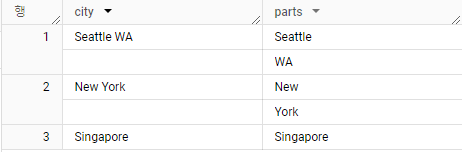

<br>

#### `UNION ALL`

In [57]:
sql = '''
WITH example AS (
  SELECT 'Sat' AS day, 1451 AS numrides, 1018 AS oneways
  UNION ALL SELECT 'Sun', 2376, 936
  UNION ALL SELECT 'Mon', 1476, 736
)

SELECT * FROM example
WHERE numrides < 2000
'''

In [58]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,day,numrides,oneways
0,Sat,1451,1018
1,Mon,1476,736


<br>

### 배열과 구조체

<br>

#### `ARRAY_AGG`
- 배열 생성

<br>

- `gender`별로 값을 배열화

In [59]:
sql = '''
SELECT 
  gender
  , ARRAY_AGG(numtrips order by year) AS numtrips
FROM (
  SELECT
    gender
    , EXTRACT(YEAR FROM starttime) AS year
    , COUNT(1) AS numtrips
  FROM
    `bigquery-public-data`.new_york_citibike.citibike_trips
  WHERE gender != 'unknown' AND starttime IS NOT NULL
  GROUP BY gender, year
  HAVING year > 2016
)
GROUP BY gender
'''

In [60]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gender,numtrips
0,female,"[3236735, 1260893]"
1,male,"[9306602, 3955871]"


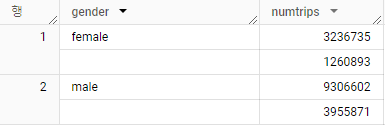

<br>

- 빅쿼리는 JSON과 같은 계층 형식의 데이터를 수집할 수 있으므로,
    
    다음과 같은 JSON 배열도 입력 데이터로 사용할 수 있음
    

- 아래와 같은 JSON 파일을 통하여 테이블을 생성하면, `numtrips` 컬럼이 배열 타입인 테이블이 생성
    - 배열은 `NULL`이 아닌 요소의 순서 리스트
    
- **기술적으로 배열은 `NULL`값을 가질 수 있지만, 그 배열은 테이블에 저장할 수는 없음**

In [61]:
[{
  "gender": "female",
  "numtrips": ["3236735", "1260893"]
}, {
  "gender": "male",
  "numtrips": ["9306602", "3955871"]
}]

[{'gender': 'female', 'numtrips': ['3236735', '1260893']},
 {'gender': 'male', 'numtrips': ['9306602', '3955871']}]

<br>

#### `STRUCT`
- **구조체 (`STRUCT`)는 순서를 갖는 필드의 그룹**
- 필드에는 원하는 이름을 지정할 수 있으며, 가독성을 위해서라도 이름을 지정하는 것을 지양


In [62]:
sql = '''
SELECT 
  [
    STRUCT('male' AS gender, [9306602, 3955871] AS numtrips)
    , STRUCT('female' AS gender, [3236735, 1260893] AS numtrips)
  ] AS bikerides
'''

In [63]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,bikerides
0,"[{'gender': 'male', 'numtrips': [9306602, 3955..."


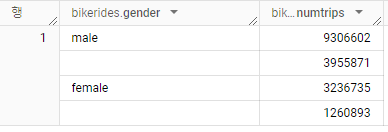

<br>

#### 튜플
- **`STRUCT` 키워드와 필드 이름을 생략하면, 튜플 또는 익명 구조체 (anonymous struct)가 생성**
- 빅쿼리는 쿼리 결과에서 이름이 지정되지 않은 컬럼 및 구조체 필드에 임의의 이름을 할당

In [64]:
sql = '''
SELECT 
  [
    ('male', [9306602, 3955871])
    , ('female', [3236735, 1260893])
  ]
'''

In [65]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,f0_
0,"[{'_field_1': 'male', '_field_2': [9306602, 39..."


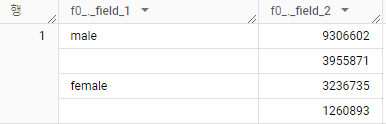

<br>

#### 배열의 활용
- 배열을 생성하여, 배열의 길이와, 배열 내의 개별 항목을 탐색
    - **`ARRAY_LENGTH()` : 배열의 길이**
    - **`OFFSET(0)`은 배열의 첫 번째 값을 의미**

In [66]:
sql = '''
SELECT 
  ARRAY_LENGTH(bikerides) AS num_items
  , bikerides[ OFFSET(0) ].gender AS first_gender
FROM
(SELECT 
  [
    STRUCT('male' AS gender, [9306602, 3955871] AS numtrips)
    , STRUCT('female' AS gender, [3236735, 1260893] AS numtrips)
  ] AS bikerides)
'''

In [67]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,num_items,first_gender
0,2,male


<br>

#### `UNNEST`
- **배열의 요소를 행으로 반환**

In [70]:
sql = '''
SELECT * FROM UNNEST(
  [
    STRUCT('male' AS gender, [9306602, 3955871] AS numtrips)
    , STRUCT('female' AS gender, [3236735, 1260893] AS numtrips)
  ])
'''

In [71]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gender,numtrips
0,male,"[9306602, 3955871]"
1,female,"[3236735, 1260893]"


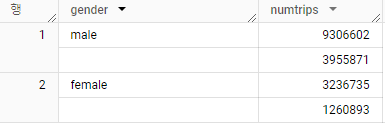

<br>

In [68]:
sql = '''
SELECT numtrips FROM UNNEST(
  [
    STRUCT('male' AS gender, [9306602, 3955871] AS numtrips)
    , STRUCT('female' AS gender, [3236735, 1260893] AS numtrips)
  ])
'''

In [69]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,numtrips
0,"[9306602, 3955871]"
1,"[3236735, 1260893]"


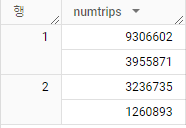

<br>

### 테이블 `JOIN`

- **`JOIN`의 유형을 지정하지 않으면 `INNER JOIN`이 기본적으로 사용**

- 두 테이블의 데이터를 날짜별로 JOIN

In [86]:
sql = '''
WITH bicycle_rentals AS (
  SELECT
    COUNT(starttime) AS num_trips,
    EXTRACT(DATE FROM starttime) AS trip_date
  FROM `bigquery-public-data`.new_york_citibike.citibike_trips
  GROUP BY trip_date
),

rainy_days AS
(
SELECT
  date,
  (MAX(prcp) > 5) AS rainy
FROM (
  SELECT
    wx.date AS date,
    IF (wx.element = 'PRCP', wx.value/10, NULL) AS prcp
  FROM
    `bigquery-public-data.ghcn_d.ghcnd_2016` AS wx
  WHERE
    wx.id = 'USW00094728'
)
GROUP BY
  date
)

SELECT
  bk.trip_date,
  bk.num_trips,
  wx.rainy
FROM bicycle_rentals AS bk
JOIN rainy_days AS wx
ON wx.date = bk.trip_date
LIMIT 5
'''

In [87]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,trip_date,num_trips,rainy
0,2016-04-22,48815,False
1,2016-08-04,56604,False
2,2016-03-16,36067,False
3,2016-08-22,54404,False
4,2016-01-29,16028,False


<br>

#### `INNER JOIN`
- `JOIN`조건에 동등성 검사를 할 필요는 없음
- 빅쿼리는 `JOIN`을 효율적으로 실행할 수 없을 때, 오류를 반환하므로,
    
    가능한 동등 조건을 사용하는 것이 좋지만, 기본적으로는 어떤 Boolean 조건도 사용 가능

In [88]:
sql = '''
WITH from_item_a AS (
  SELECT 'Dalles' AS city, 'OR' AS state
  UNION ALL SELECT 'Tokyo', 'Tokyo'
  UNION ALL SELECT 'Mumbai', 'Maharashtra'
),

from_item_b AS (
  SELECT 'OR' AS state, 'USA' AS country
  UNION ALL SELECT 'Tokyo', 'Japan'
  UNION ALL SELECT 'Maharashtra', 'India'
)

SELECT from_item_a.*, country
FROM from_item_a
JOIN from_item_b
ON from_item_a.state = from_item_b.state
'''

In [92]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,city,state,surcharge
0,Dalles,OR,Japan
1,Dalles,OR,India
2,Tokyo,Tokyo,USA
3,Tokyo,Tokyo,India
4,Mumbai,Maharashtra,USA
5,Mumbai,Maharashtra,Japan


<br>

#### `CROSS JOIN`
- **`CROSS JOIN` (곱집합)은 `JOIN` 조건이 없으며, 결합 대상의 모든 행이 결합**


In [95]:
sql = '''
WITH winners AS (
  SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
),
gifts AS (
  SELECT 'Google Home' AS gift
  UNION ALL SELECT 'Google Hub'
  UNION ALL SELECT 'Pixel3'
)

SELECT person, gift
FROM winners
CROSS JOIN gifts
'''

In [96]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,gift
0,John,Google Home
1,John,Google Hub
2,John,Pixel3
3,Hiroshi,Google Home
4,Hiroshi,Google Hub
5,Hiroshi,Pixel3
6,Sita,Google Home
7,Sita,Google Hub
8,Sita,Pixel3


<br>

- `CROSS JOIN`은 명시적으로 작성하여 사용할 수도 있지만, 쉼표를 이용하면 더 간단하게 작성 가능


``` SQL
SELECT preson, gift
FROM winners, gifts
```

<br>

#### `OUTER JOIN`


<br>



- 두 테이블에 대한 `JOIN`

In [105]:
sql = '''
SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
  UNION ALL SELECT 'Kwame', '50m'
'''
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,event
0,John,100m
1,Hiroshi,200m
2,Sita,400m
3,Kwame,50m


In [107]:
sql = '''
SELECT 'Google Home' AS gift, '100m' AS event
  UNION ALL SELECT 'Google Hub', '200m'
  UNION ALL SELECT 'Pixel3', '400m'
  UNION ALL SELECT 'Google Mini', '5000m'
'''
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,gift,event
0,Google Home,100m
1,Google Hub,200m
2,Pixel3,400m
3,Google Mini,5000m


<br>

- `INNER JOIN` : 조건을 만족하는 행만 유지

In [108]:
sql = '''
WITH winners AS (
  SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
  UNION ALL SELECT 'Kwame', '50m'
),
gifts AS (
  SELECT 'Google Home' AS gift, '100m' AS event
  UNION ALL SELECT 'Google Hub', '200m'
  UNION ALL SELECT 'Pixel3', '400m'
  UNION ALL SELECT 'Google Mini', '5000m'
)

SELECT *
FROM winners
INNER JOIN gifts
ON winners.event = gifts.event
'''

In [109]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,event,gift,event_1
0,John,100m,Google Home,100m
1,Hiroshi,200m,Google Hub,200m
2,Sita,400m,Pixel3,400m


<br>

- `FULL OUTER JOIN` : 조건이 충족되지 않아도 모든 행이 유지

In [110]:
sql = '''
WITH winners AS (
  SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
  UNION ALL SELECT 'Kwame', '50m'
),
gifts AS (
  SELECT 'Google Home' AS gift, '100m' AS event
  UNION ALL SELECT 'Google Hub', '200m'
  UNION ALL SELECT 'Pixel3', '400m'
  UNION ALL SELECT 'Google Mini', '5000m'
)

SELECT *
FROM winners
FULL OUTER JOIN gifts
ON winners.event = gifts.event
'''

In [111]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,event,gift,event_1
0,John,100m,Google Home,100m
1,Hiroshi,200m,Google Hub,200m
2,Sita,400m,Pixel3,400m
3,Kwame,50m,None,None
4,None,None,Google Mini,5000m


<br>

- `LEFT OUTER JOIN` 

In [115]:
sql = '''
WITH winners AS (
  SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
  UNION ALL SELECT 'Kwame', '50m'
),
gifts AS (
  SELECT 'Google Home' AS gift, '100m' AS event
  UNION ALL SELECT 'Google Hub', '200m'
  UNION ALL SELECT 'Pixel3', '400m'
  UNION ALL SELECT 'Google Mini', '5000m'
)

SELECT *
FROM winners
LEFT OUTER JOIN gifts
ON winners.event = gifts.event
'''

In [116]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,event,gift,event_1
0,John,100m,Google Home,100m
1,Hiroshi,200m,Google Hub,200m
2,Sita,400m,Pixel3,400m
3,Kwame,50m,None,None


<br>

- `RIGHT OUTER JOIN`

In [121]:
sql = '''
WITH winners AS (
  SELECT 'John' AS person, '100m' AS event
  UNION ALL SELECT 'Hiroshi', '200m'
  UNION ALL SELECT 'Sita', '400m'
  UNION ALL SELECT 'Kwame', '50m'
),
gifts AS (
  SELECT 'Google Home' AS gift, '100m' AS event
  UNION ALL SELECT 'Google Hub', '200m'
  UNION ALL SELECT 'Pixel3', '400m'
  UNION ALL SELECT 'Google Mini', '5000m'
)

SELECT *
FROM winners
RIGHT JOIN gifts
ON winners.event = gifts.event
'''

In [122]:
query_job = client.query(sql)
df = query_job.to_dataframe()
df

,person,event,gift,event_1
0,John,100m,Google Home,100m
1,Hiroshi,200m,Google Hub,200m
2,Sita,400m,Pixel3,400m
3,None,None,Google Mini,5000m


<br>

### 쿼리 저장 및 공유

<br>

#### 쿼리 기록 및 캐싱


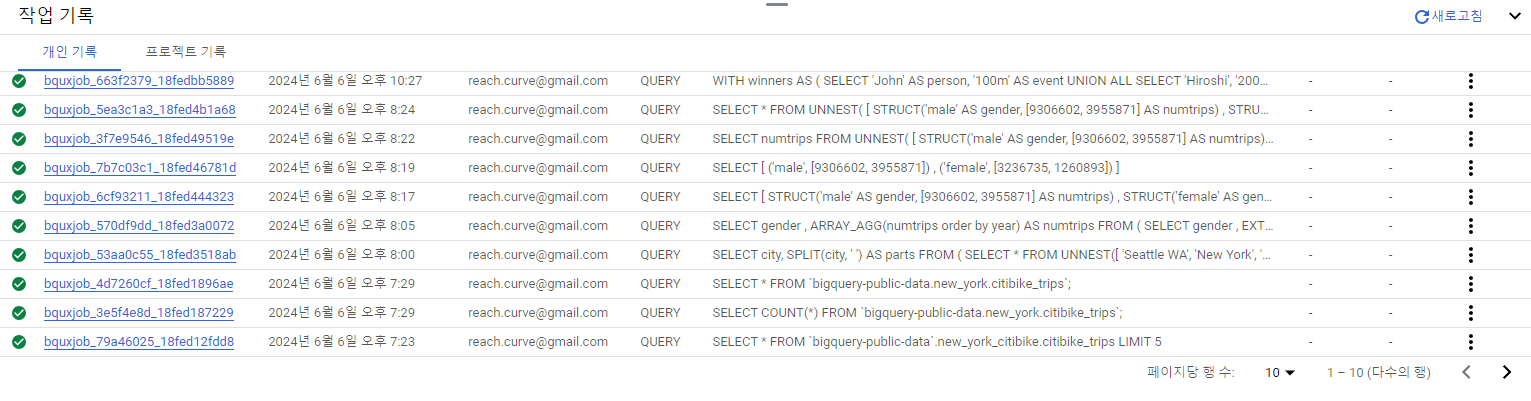

<br>

#### 저장된 쿼리

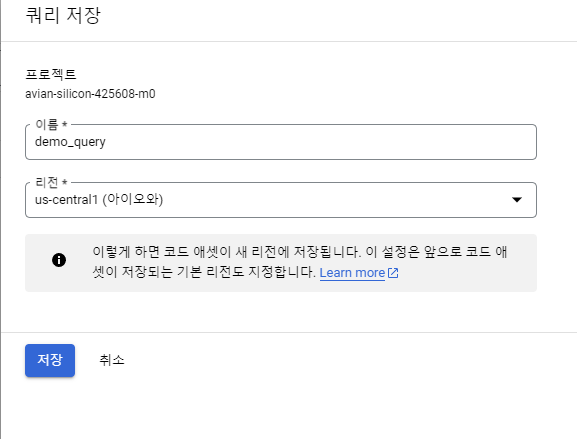

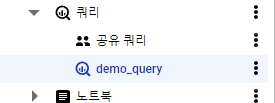

<br>

#### 저장된 쿼리 공유
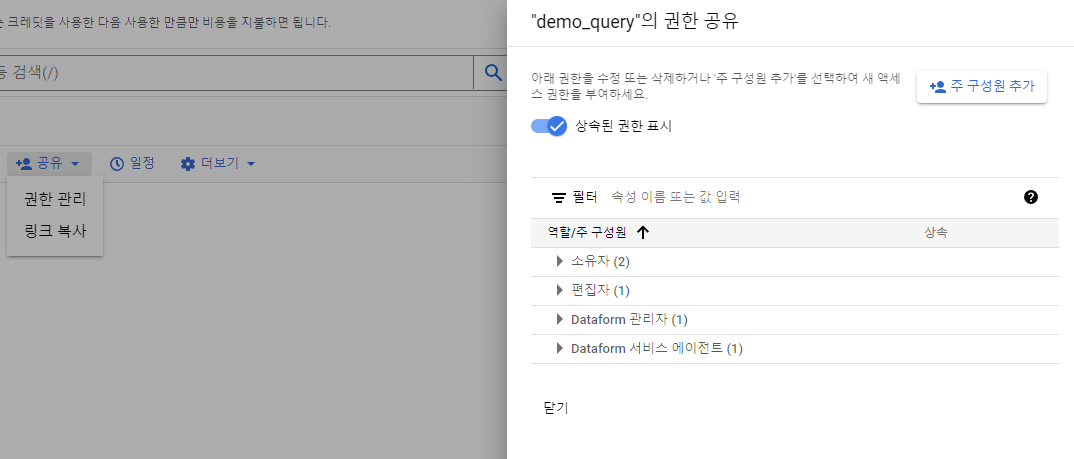

<br>

#### 뷰와 공유 쿼리의 비교
* 쿼리 링크를 공유하면, 공동 작업자가 항상 쿼리의 최신 버전을 얻을 수 있도록 쿼리를 계속 편집할 수 있음
- 특정 부분 집합에서 쿼리해야 하거나 쿼리 결과에 다시 쿼리를 해야 할 때, 쿼리를 뷰로 저장하고 뷰에 대한 링크를 보내는 것이 좋음
    
    쿼리를 공유하는 것보다 뷰를 공유하면, 뷰가 데이터셋에 저장되며 세분화된 IAM 컨트롤을 제공할 수 있음

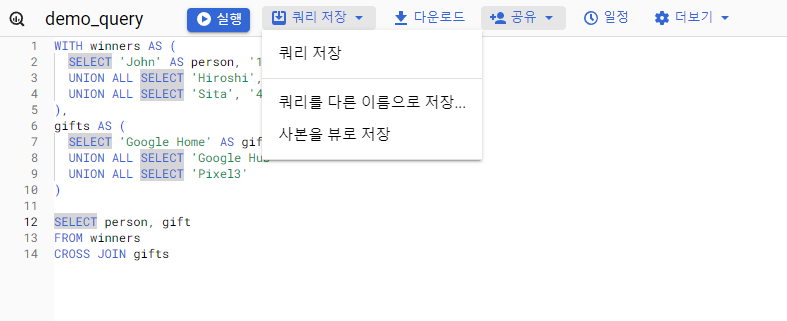

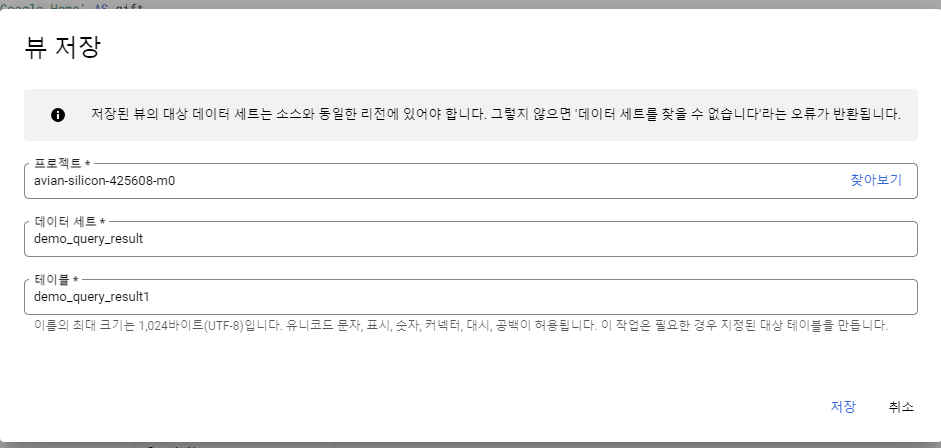